In [1]:
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1) 
y = 1 + 0.3 * X + 0.1 * np.random.randn(m, 1)

In [3]:
# validation data를 만들어 나가는 중

X_new = np.linspace(0, 3, 100).reshape(100, 1)
y_new = 1 + 0.3 * X_new + 0.1 * np.random.randn(100, 1)

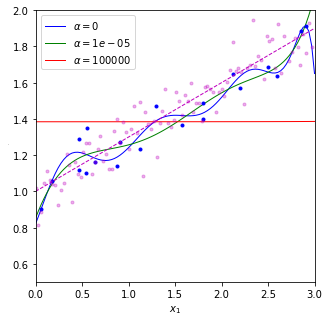

In [4]:
# 규제가 있는 10차 다항회귀 

def plot_model_pre(model_class, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g-", "r-")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        
        poly_features = PolynomialFeatures(degree=10, include_bias=False)
        std_scaler = StandardScaler()
            
        X_poly = poly_features.fit_transform(X)
        X_poly_scaled = std_scaler.fit_transform(X_poly)
        model.fit(X_poly_scaled, y)
        
        y_new_regul = model.predict(std_scaler.transform(poly_features.transform(X_new)))
        plt.plot(X_new, y_new_regul, style, linewidth=1, label=r"$\alpha = {}$".format(alpha))
        
    plt.plot(X, y, "b.", linewidth=3)
    plt.plot(X_new,y_new, "m.", linewidth=3, alpha=0.3)
    plt.plot(X_new, 1+0.3*X_new, "m--", linewidth=1)
    plt.legend(loc="upper left", fontsize=10)
    plt.xlabel("$x_1$", fontsize=10)
    plt.axis([0, 3, 0.5, 2])

plt.figure(figsize=(5,5))
plot_model_pre(Ridge, alphas=(0, 10**-5, 10**5), solver="cholesky", random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=1)
plt.show()

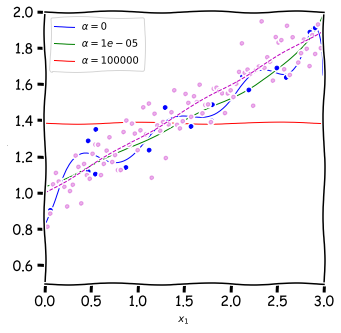

In [5]:
with plt.xkcd():
    plt.figure(figsize = (5,5))
    plot_model_pre(Ridge, alphas = (0,10**-5,10**5),solver = "saga",random_state = 42)
    plt.ylabel("$y$",rotation = 0, fontsize = 1)
    plt.show()

## Pipeline 사용

In [6]:
from sklearn.pipeline import Pipeline

In [7]:
def plot_model(model_class, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-","g-","r-")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        
        model = Pipeline([
            ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
            ("std_scaler",StandardScaler()),
            ("regul_reg",model),
        ])
        
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new,y_new_regul,style, linewidth = 1, label = r"$\alpha = {}$".format(alpha))
        
    
    plt.plot(X,y,"b.",linewidth = 3)
    plt.plot(X_new, y_new, "m.",linewidth =3, alpha = 0.3)
    plt.plot(X_new, 1+0.3*X_new, "m--",linewidth =1)
    plt.legend(loc = "upper left",fontsize = 10)
    plt.xlabel("$x_1$",fontsize = 10)
    plt.axis([0,3,0.5,2])

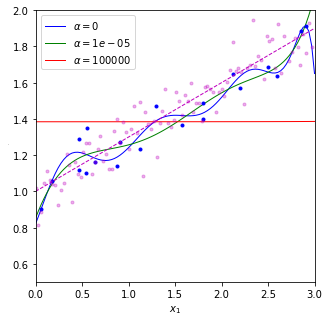

In [8]:
plt.figure(figsize = (5,5))
plot_model(Ridge, alphas = (0,10**-5,10**5), random_state=42)
plt.ylabel("$y$",rotation = 0, fontsize = 1)
plt.rcdefaults()
plt.show()

In [9]:
my_tr = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("std_scaler",StandardScaler())])

X_tr = my_tr.fit_transform(X)

In [10]:
X_tr[:4]

array([[-0.27730331, -0.51622931, -0.59771496, -0.60210187, -0.57767206,
        -0.54639883, -0.51653147, -0.49043859, -0.46830126, -0.449629  ],
       [ 1.64394295,  1.96057982,  2.16836797,  2.3068604 ,  2.39863669,
         2.45825111,  2.49503096,  2.51510044,  2.52264523,  2.52064204],
       [ 0.91462239,  0.76676347,  0.56688387,  0.37360612,  0.20684303,
         0.07062371, -0.03720869, -0.12079013, -0.18452257, -0.23242128],
       [ 0.47001683,  0.19125759, -0.04223608, -0.20525654, -0.30870164,
        -0.36965751, -0.40257773, -0.41784606, -0.42241897, -0.42078086]])

In [11]:
from sklearn.linear_model import RidgeCV

# 7개의 alpha값에 대하여 가장 좋은 모델을 반환함
clf = RidgeCV(alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3],scoring="r2").fit(X_tr,y)

In [12]:
clf.alpha_

0.1

In [13]:
# 0.1을 기준으로 세분화
clf = RidgeCV(alphas=[0.05,0.1,0.5],scoring="r2").fit(X_tr,y)
clf.alpha_

0.5

In [14]:
# 0.5를 기준으로 세분화
clf = RidgeCV(alphas=[0.1,0.3,0.5,0.6],scoring="r2").fit(X_tr,y)
clf.alpha_

0.3

In [15]:
# 0.3를 기준으로 세분화
clf = RidgeCV(alphas=[0.25,0.3,0.35],scoring="r2").fit(X_tr,y)
clf.alpha_

0.3

In [16]:
clf.predict(my_tr.transform(X_new[:5]))

array([[1.0350755 ],
       [1.04196859],
       [1.04887989],
       [1.05580933],
       [1.06275684]])

In [17]:
clf.coef_, clf.intercept_

(array([[ 2.04383040e-01,  2.75877253e-02, -2.34940881e-03,
         -8.88173617e-03, -9.55326984e-03, -6.38695956e-03,
          1.88318873e-05,  8.98776960e-03,  1.97985145e-02,
          3.17796667e-02]]),
 array([1.38465065]))

In [18]:
clf.best_score_ # 모델의 정확도

0.8660278843491014

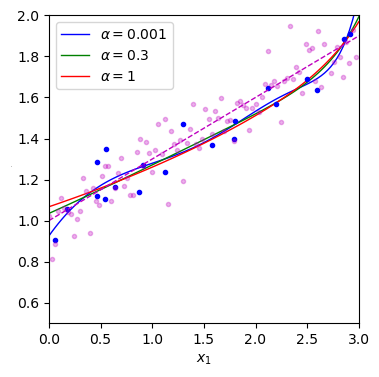

In [19]:
plt.figure(figsize=(4,4))
plot_model(Ridge, alphas = (1e-3,0.3,1), random_state=42)
plt.ylabel("$y$",rotation = 0, fontsize = 1)
plt.show()

가장 좋은 alpha값 :  0.0001661


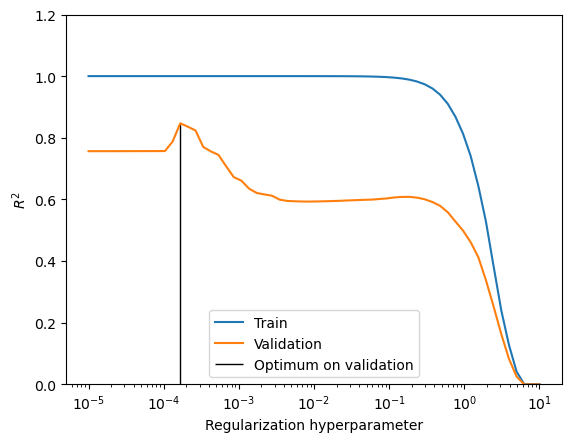

In [20]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

# 데이터셋 생성 
num_train, num_val, num_features = 100, 100, 500
np.random.seed(0)
coef = np.random.randn(num_features)
coef[50:] = 0.0  # 처음 50개의 특성만 모델에 영향을 미치도록 설정 

X = np.random.randn(num_train + num_val, num_features)
y = np.dot(X, coef)

# 훈련 데이터셋과 검증 데이터셋으로 나누기 
X_train, X_val = X[:num_train], X[num_train:]
y_train, y_val = y[:num_train], y[num_train:]

# 훈련 데이터셋과 검증 데이터셋에 대한 성능(r2)을 각각 구함  
alphas = np.logspace(-5, 1, 60)

enet = ElasticNet(l1_ratio=0.7, max_iter=10000)
train_scores = list()
val_scores = list()
for alpha in alphas:
    enet.set_params(**{'alpha':alpha}) #* * * * * * *   # 여기에 enet의 `alpha` 파라미터를 재설정하는 코드를 작성하시오.
    enet.fit(X_train,y_train) #* * * * * * *   # 여기에 재설정된 enet으로 학습을 시키는 코드를 작성하시오. 
    train_scores.append(enet.score(X_train, y_train))
    val_scores.append(enet.score(X_val, y_val))

alpha_optim_idx = np.argmax(val_scores) #* * * * * * *  # 여기에 성능이 가장 좋은 alpha의 인덱스(alphas에서의)를 구하시오. 
alpha_optim = alphas[alpha_optim_idx]
print(f"가장 좋은 alpha값 : {alpha_optim: .7f}")

# 가장 좋은 alpha 값으로 추정기 재설정 
enet.set_params(**{'alpha':alpha_optim})#* * * * * * *  # 여기에 가장 좋은 `alpha` 파라미터로 enet을 재설정하는 코드를 작성하시오.
coef_ = enet.fit(X, y).coef_

# 결과 그림으로 나타내기 
plt.semilogx(alphas, train_scores, label='Train')
plt.semilogx(alphas, val_scores, label='Validation')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(val_scores), color='k',
           linewidth=1, label='Optimum on validation')
plt.legend(loc='lower center')
plt.ylim([0, 1.2])
plt.xlabel('Regularization hyperparameter')
plt.ylabel(r'$R^2$')
plt.show()

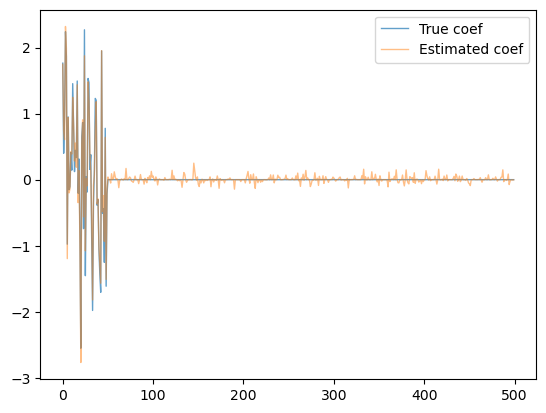

In [21]:
plt.plot(coef, label='True coef', linewidth=1, alpha=0.7)
plt.plot(coef_, label='Estimated coef', linewidth=1, alpha=0.5)
plt.legend()
plt.show()

In [24]:
# 조기종료 실습

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone # 학습된 예측기를 복사

# 데이터셋 생성
np.random.seed(42)
m = 100
X2 = 6 * np.random.rand(m,1)-3
y2 = 2 + X2 + 0.5 * X2**2 + np.random.randn(m,1) # y = 2 + x + 0.5x^2 + e


# 데이터셋 나누기(train_set = 25개, validation_set = 25개)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2[:50],y2[:50].ravel(),test_size = 0.5, random_state = 10)
# => ravel을 한 이유? [[1],[2]] 이렇게 되어있는 것을 [1,2]로 바꾸기

# 90차 다항식 특성벡터로 확장하고 스케일링
poly_scaler = Pipeline([
    ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler())
])

X2_train_poly_scaled = poly_scaler.fit_transform(X2_train)
X2_val_poly_scaled = poly_scaler.transform(X2_val)

# 추정기 객체 생성 ('penalty=None', 'learning_rate = "constant"')
sgd_reg = SGDRegressor(max_iter=1, tol = -np.infty, warm_start = True,
                      penalty = None, learning_rate = "constant",eta0 = 0.0005, random_state = 42)
# => 현재로서는 조기종료 방지하기 위해 tol = -무한대

minimum_val_error = float("inf") # 초기값을 이렇게 두고 업데이트 할 예정

best_epoch = None
best_model = None

n_epochs = 1000
time_limit = 5 # 개선되지 않는 것을 5번까지 기다릴 것 (원래 SGD안에 있지만 우리가 직접 설정)
time_ctr = 0 # 몇번이나 업데이트 안되었는지 카운트

for epoch in range(n_epochs):
    sgd_reg.fit(X2_train_poly_scaled,y2_train) # 중지된 곳에서 다시 시작함
    y2_val_predict = sgd_reg.predict(X2_val_poly_scaled)
    val_error = mean_squared_error(y2_val,y2_val_predict)
    time_ctr += 1
    
    if val_error < minimum_val_error : 
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg) # 객체를 복사해서 저장
        time_ctr = 0
    if time_ctr >= time_limit:
        break

print(f"best epoch: {best_epoch}")

best epoch: 239


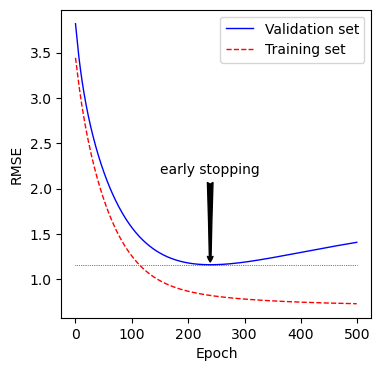

In [25]:
# 위 에서 얻은 결과를 그림으로 그리기 
sgd_reg = SGDRegressor(max_iter=1, tol= -np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X2_train_poly_scaled,y2_train)
    y2_train_predict = sgd_reg.predict(X2_train_poly_scaled)
    y2_val_predict = sgd_reg.predict(X2_val_poly_scaled)
    train_errors.append(mean_squared_error(y2_train,y2_train_predict))
    val_errors.append(mean_squared_error(y2_val,y2_val_predict))
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(4,4))
###################################################
# 주석달기 
plt.annotate('early stopping',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', arrowstyle='fancy'),
             fontsize=10
            )

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=0.5)
plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=1, label="Training set")
plt.legend(loc="upper right", fontsize=10)
plt.xlabel("Epoch", fontsize=10)
plt.ylabel("RMSE", fontsize=10)
plt.show()